In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import dataset
tracks = pd.read_csv("tracks.csv")

In [3]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
#check for null values
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [5]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [7]:
# convert release_date column to date time 
tracks["release_date"] = pd.to_datetime(tracks["release_date"])

In [8]:
# top 10 songs by popularity 
tracks[["name","release_date","artists","popularity"]].sort_values(by='popularity',ascending=False)[:10]

,name,release_date,artists,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),2021-03-19,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
93803,drivers license,2021-01-08,['Olivia Rodrigo'],99
93804,Astronaut In The Ocean,2021-01-06,['Masked Wolf'],98
92810,Save Your Tears,2020-03-20,['The Weeknd'],97
92811,telepatía,2020-12-04,['Kali Uchis'],97
93805,Leave The Door Open,2021-03-05,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
92813,Blinding Lights,2020-03-20,['The Weeknd'],96
92814,The Business,2020-09-16,['Tiësto'],95
92816,Heartbreak Anniversary,2020-03-27,['Giveon'],94
92819,Bandido,2020-12-10,"['Myke Towers', 'Juhn']",94


In [9]:
## top popular songs which have 90+ popularity
tracks.query('popularity>90').sort_values('popularity',ascending=False)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.1320,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.4720,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.6440,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.5530,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.7190,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.2350,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.1900,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.5430,89.087,3


In [20]:
# let's convert songs deration to minutes  
# 1 min = 60000 ms

tracks["duration_min"] = tracks["duration_ms"].apply(lambda x: round((x/60000),2))

In [21]:
tracks.drop('duration_ms',inplace=True,axis=1)

In [23]:
# top 5 longest song 
tracks[["name","duration_min","release_date","artists","popularity"]].sort_values(by='duration_min',ascending=False)[:5]

,name,duration_min,release_date,artists,popularity
326329,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,93.69,1979-07-28,['ท่านพุทธทาส'],3
450241,Brown Noise - 90 Minutes,90.06,2013-06-05,['Sound Dreamer'],50
131876,New Year's Eve 2015 Party Hits - Full DJ Party...,84.04,2014-12-19,['Various Artists'],0
586457,Surah Al-Araf,83.25,2010-01-01,['Sheikh Mishary Rashid Alfasay'],39
399471,Tech House The Yearbook 2018 - Continuous Mix 2,81.07,2018-12-16,['Monoteque'],0


In [38]:
# who has most monthly listeners
tracks["artists"].value_counts()[:5]

['Die drei ???']         3856
['TKKG Retro-Archiv']    2006
['Benjamin Blümchen']    1503
['Bibi Blocksberg']      1472
['Lata Mangeshkar']      1373
Name: artists, dtype: int64

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration_min')]

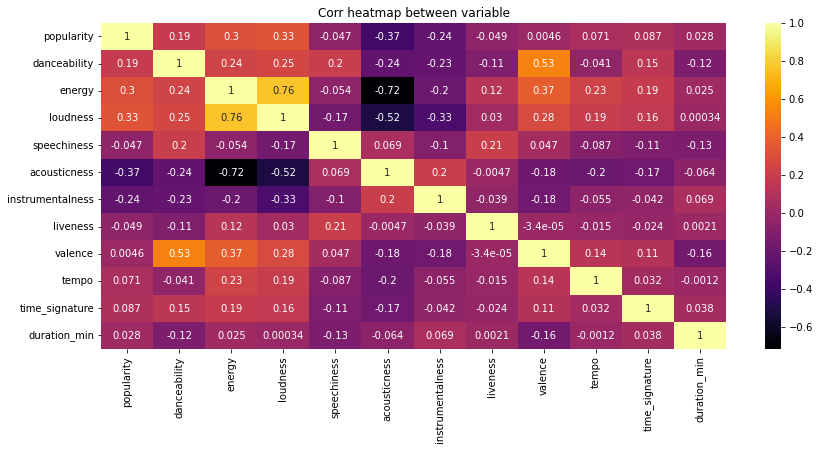

In [40]:
corr_df=tracks.drop(["key","mode","explicit"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,cmap="inferno")
heatmap.set_title("Corr heatmap between variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [42]:
sample_df=tracks.sample(int(0.004*len(tracks)))
sample_df.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
150453,3YDnx2hvwBVMlWE0KiKmah,Caminando,17,0,['Rubén Blades'],['5BwMgvRwlq61SmknvsVIQj'],1991-01-01,0.742,0.622,0,-10.651,1,0.0403,0.4730,0.000030,0.2920,0.826,99.561,4,2.73
19115,1aDga0iHPXBpGLaxjJpBgO,"Spinning Song, No.4",0,0,"['Felix Mendelssohn', 'William Kapell']","['6MF58APd3YV72Ln2eVg710', '5qsrEqlTIFVbXBB2xd...",1945-01-01,0.385,0.113,9,-23.487,0,0.0451,0.9950,0.854000,0.2060,0.597,94.998,4,1.63
457597,3d0EBvt6cNptTQm11ZqHGr,La poupée qui fait,21,0,['Serge Gainsbourg'],['01C9OoXDvCKkGcf735Tcfo'],1973-01-01,0.557,0.440,5,-13.598,1,0.0383,0.0854,0.293000,0.1160,0.655,146.486,4,3.04
474404,45hvERQti0lxhrFCyGXCnL,Reirme Más,34,0,['Leo García'],['54YdJC33Ztc1CNIuodmyUb'],2003-01-01,0.783,0.790,11,-6.869,0,0.0383,0.0556,0.000236,0.0501,0.967,125.030,4,3.65
208802,4p10OWTgdBq0Njzvh13aC8,Vuelve Palomita,31,0,['Agua Marina'],['5ZAR5Usb11xw4KENbEE8uZ'],2002-03-06,0.731,0.826,10,-5.012,0,0.0371,0.5870,0.124000,0.0659,0.969,107.505,4,4.88


[Text(0.5, 1.0, 'Loudness vs Energy corr')]

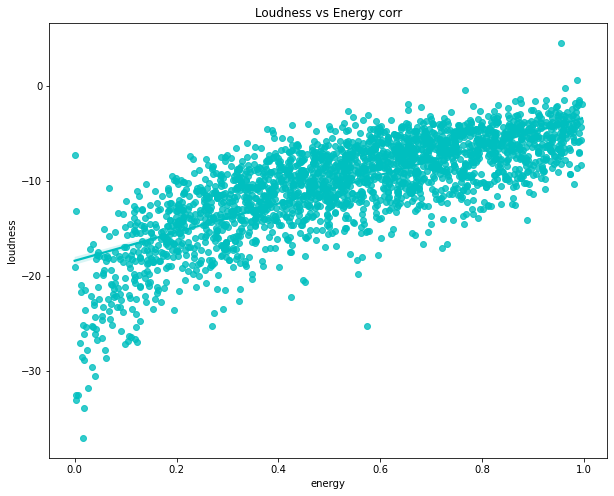

In [43]:
plt.figure(figsize=(10,8))
sns.regplot(data=sample_df,y="loudness",x="energy",color="c").set(title="Loudness vs Energy corr")

[Text(0.5, 1.0, 'popularity vs accoustic corr')]

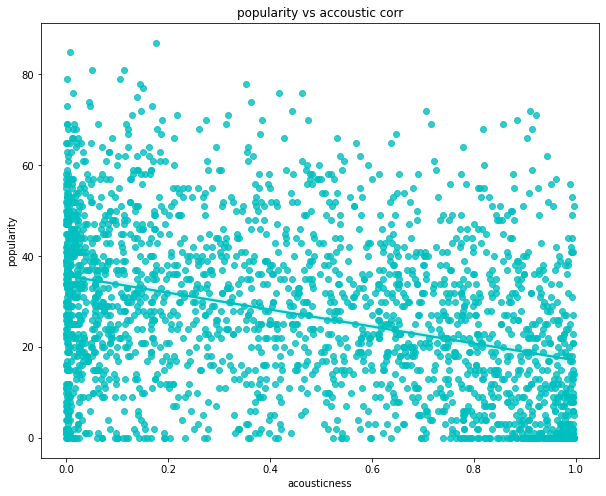

In [44]:
plt.figure(figsize=(10,8))
sns.regplot(data=sample_df,y="popularity",x="acousticness",color="c").set(title="popularity vs accoustic corr")

In [45]:
tracks["year"]=tracks["release_date"].dt.year

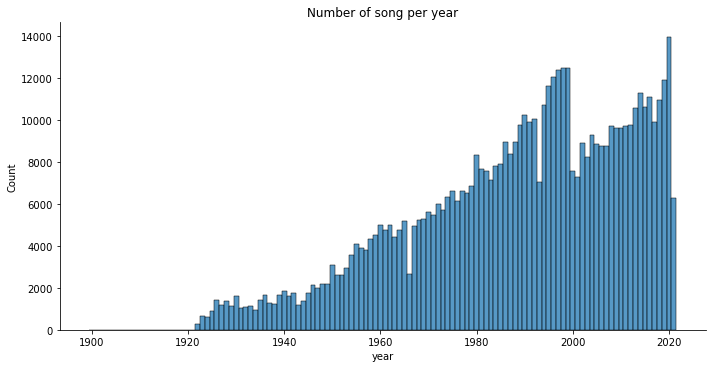

In [46]:
sns.displot(tracks["year"],discrete=True,aspect=2,height=5,kind="hist").set(title="Number of song per year")


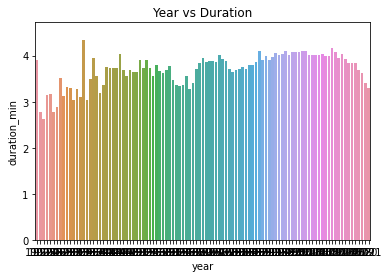

In [51]:
total_dr=tracks["duration_min"]
fig,ax=plt.subplots()
fig=sns.barplot(x=tracks["year"],y=total_dr,ax=ax,errwidth=False).set(title="Year vs Duration")

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

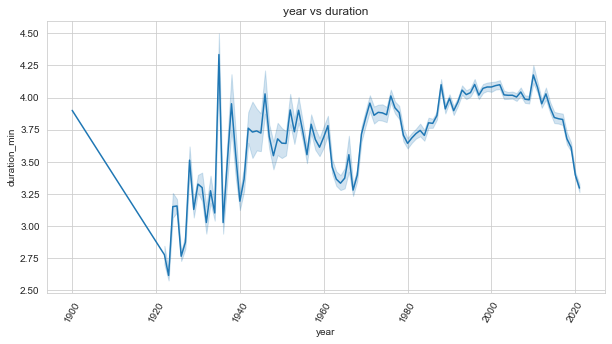

In [52]:
sns.set_style(style="whitegrid")
fig_dims=(10,5)
fig,ax=plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=tracks["year"],y=total_dr,ax=ax).set(title="year vs duration")
plt.xticks(rotation=60)

In [53]:
df=pd.read_csv("SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Text(0, 0.5, 'Geners')

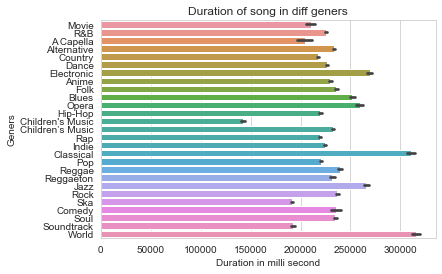

In [54]:
plt.title("Duration of song in diff geners")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y=df["genre"],x=df["duration_ms"],data=df)
plt.xlabel("Duration in milli second")
plt.ylabel("Geners")

[Text(0.5, 1.0, 'top 10 genres by popularity')]

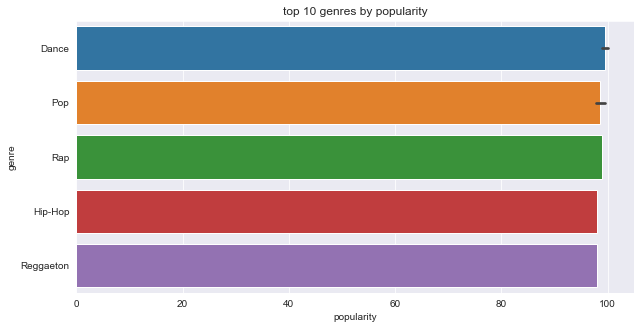

In [55]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous=df.sort_values("popularity",ascending=False).head(10)
sns.barplot(y="genre",x="popularity",data=famous).set(title="top 10 genres by popularity")